# Explanatory graphs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

# IT'S 2025 WHY HASN'T SOMEONE FIXED THIS
if ".." not in sys.path:
    sys.path.insert(0, "..")
from src.aposteriori import dfu

In [3]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import tasks.graphs


TITLE_SIZE = 20
LABEL_SIZE = 16
LESSER_LABEL_SIZE = 14
DIFF_COMMENTS_SIZE = 200
GRAPH_DIR = Path("../graphs")


sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
np.random.seed(seed=42)

In [4]:
def truncated_normal(loc, scale, lower=0, upper=10, size=100):
    a, b = (lower - loc) / scale, (upper - loc) / scale
    return scipy.stats.truncnorm(a, b, loc=loc, scale=scale).rvs(size)

## Intuition

In [5]:
colors = sns.color_palette()
bins = 10
d1_mean = 2
d2_mean = 8

In [6]:
INTUITION_SIZE = 50
d1 = truncated_normal(loc=d1_mean, scale=1.3, size=INTUITION_SIZE)
d2 = truncated_normal(loc=d2_mean, scale=1.3, size=INTUITION_SIZE)
d_union = np.hstack([d1, d2])

n_d1 = dfu(d1, bins=bins, normalized=True)
n_d2 = dfu(d2, bins=bins, normalized=True)
n_union = dfu(d_union, bins=bins, normalized=True)
ndfus = [n_d1, n_d2, n_union]

x_values = [1, 4, 7]
y_values = [0.45]*3

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_men.png


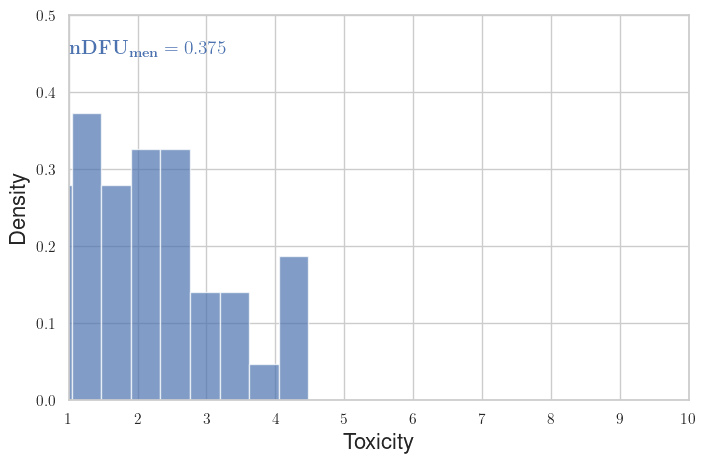

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_women.png


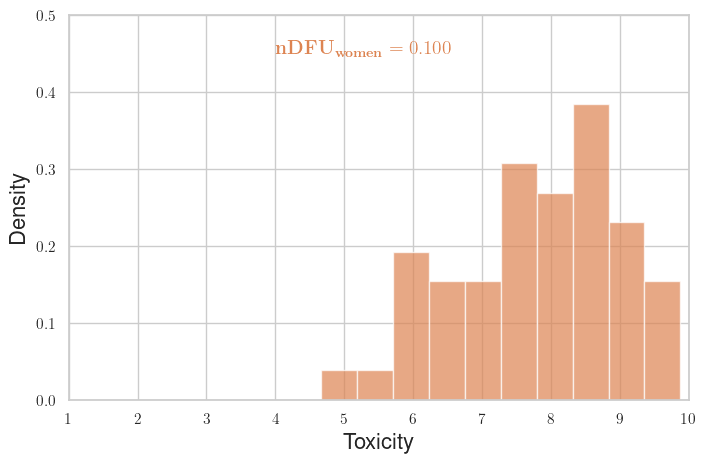

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_all.png


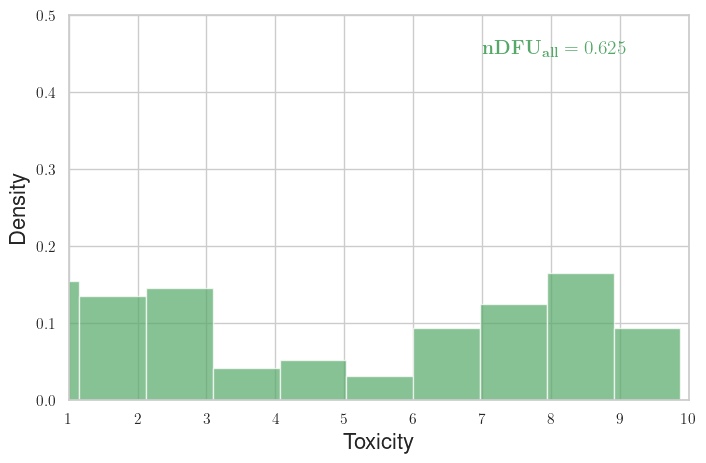

In [7]:
xlim = (1, 10)
ylim = (0, 0.5)


datasets = [d1, d2, d_union]
labels = ["Men", "Women", "All"]
type_strs = ["men", "women", "all"]
filenames = ["ndfu_men.png", "ndfu_women.png", "ndfu_all.png"]
colors_individual = colors  # assuming colors = [color_men, color_women, color_all]

# Generate 3 individual plots
for data, label, color, ndfu_value, type_str, x_text, y_text, filename in zip(
    datasets, labels, colors_individual, ndfus, type_strs, x_values, y_values, filenames
):
    plt.figure(figsize=(8, 5))
    plt.hist(
        data,
        bins=bins,
        density=True,
        alpha=0.7,
        color=color,
        label=label,
    )

    text = f"$\\mathbf{{nDFU_{{{type_str}}}}}={ndfu_value:.3f}$"
    plt.text(x_text, y_text, text, color=color, weight="bold", fontsize=LESSER_LABEL_SIZE)

    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel("Toxicity", fontsize=LABEL_SIZE)
    plt.ylabel("Density", fontsize=LABEL_SIZE)

    tasks.graphs.save_plot(GRAPH_DIR / filename)
    plt.show()

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_combined.png


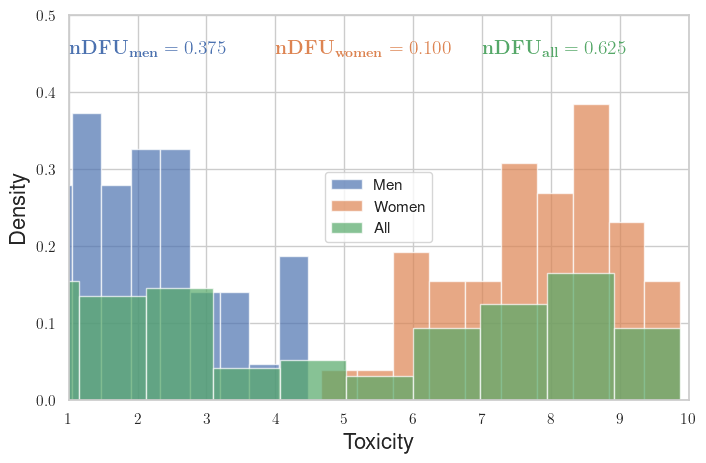

In [8]:
# --- Combined plot (4th plot) ---
plt.figure(figsize=(8, 5))
for data, label, color in zip(datasets, labels, colors_individual):
    plt.hist(
        data,
        bins=bins,
        density=True,
        alpha=0.7,
        color=color,
        label=label,
    )

# Add all nDFU annotations
for x_text, y_text, color, ndfu_value, type_str in zip(x_values, y_values, colors_individual, ndfus, type_strs):
    text = f"$\\mathbf{{nDFU_{{{type_str}}}}}={ndfu_value:.3f}$"
    plt.text(x_text, y_text, text, color=color, weight="bold", fontsize=LESSER_LABEL_SIZE)

plt.xlim(*xlim)
plt.ylim(*ylim)
plt.legend(loc="center")
plt.xlabel("Toxicity", fontsize=LABEL_SIZE)
plt.ylabel("Density", fontsize=LABEL_SIZE)

tasks.graphs.save_plot(GRAPH_DIR / "ndfu_combined.png")
plt.show()


## Why comment-level?

In [9]:
d_woman_comment1 = truncated_normal(loc=2, scale=1, size=DIFF_COMMENTS_SIZE)
d_woman_comment2 = truncated_normal(loc=6, scale=1, size=DIFF_COMMENTS_SIZE)

d_man_comment1 = truncated_normal(loc=6, scale=1, size=DIFF_COMMENTS_SIZE)
d_man_comment2 = truncated_normal(loc=2, scale=1, size=DIFF_COMMENTS_SIZE)

d_woman = np.hstack([d_woman_comment1, d_woman_comment2])
d_man = np.hstack([d_man_comment1, d_man_comment2])

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_multi_comments.png


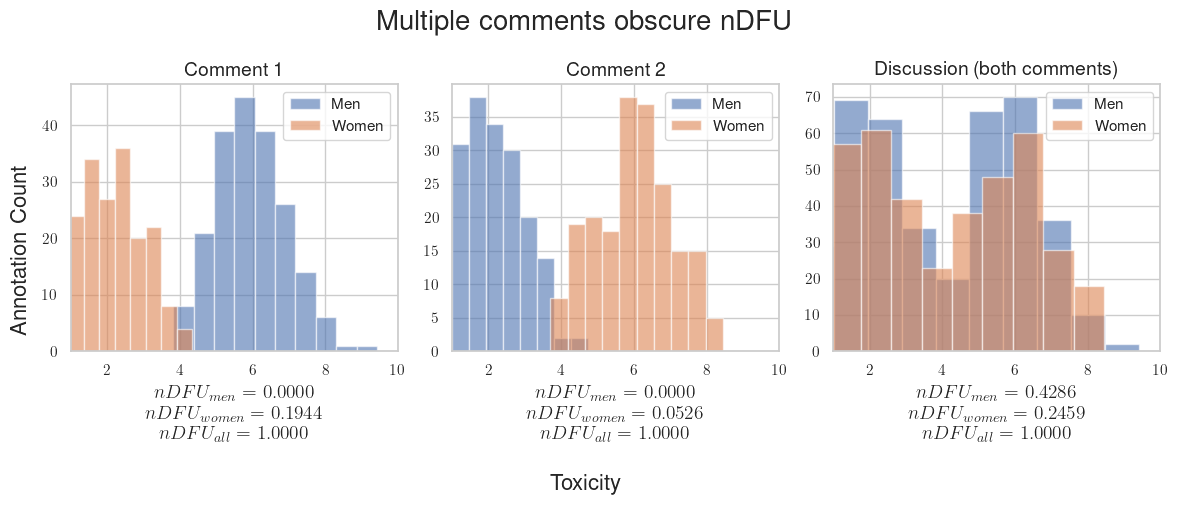

In [10]:
def plot_example(
    title: str, women_annot: list[float], men_annot: list[float], bins: int, ax
):
    ndfu_man = dfu(men_annot, bins=bins, normalized=True)
    ndfu_woman = dfu(women_annot, bins=bins, normalized=True)
    ndfu_all = dfu(np.hstack([ndfu_man, ndfu_woman]), bins=bins, normalized=True)
    
    ax.hist(men_annot, bins=bins, alpha=0.6, label="Men")
    ax.hist(women_annot, bins=bins, alpha=0.6, label="Women")
    ax.set_title(title, fontsize=LESSER_LABEL_SIZE)
    ax.legend(loc="upper right")
    ax.set_xlabel(
        f"$nDFU_{{men}}={ndfu_man:.4f}$\n"
        f"$nDFU_{{women}}={ndfu_woman:.4f}$\n"
        f"$nDFU_{{all}}={ndfu_all:.4f}$",
        fontsize=LESSER_LABEL_SIZE,
    )
    ax.set_xlim(1, 10)


fig, axs = plt.subplots(1, 3, figsize=(12, 5), tight_layout=True)

plot_example("Comment 1", d_woman_comment1, d_man_comment1, bins, axs[0])
plot_example("Comment 2", d_woman_comment2, d_man_comment2, bins, axs[1])
plot_example("Discussion (both comments)", d_woman, d_man, bins, axs[2])

fig.suptitle("Multiple comments obscure nDFU", fontsize=TITLE_SIZE)
fig.supxlabel("Toxicity", fontsize=LABEL_SIZE)
fig.supylabel("Annotation Count", fontsize=LABEL_SIZE)
tasks.graphs.save_plot(GRAPH_DIR / "ndfu_multi_comments.png")
plt.show()